# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
windows = True
augmented = False
# TODO: Fill this in based on where you saved the training and testing data
if windows == True:
    training_file = './train.p'
    validation_file='./valid.p'
    testing_file = './test.p'
else:
    training_file = 'train.p'
    validation_file='valid.p'
    testing_file = 'test.p'
if augmented:
    f = open('y_train_augmented.p', 'rb')
    g = open('X_train_augmented.p', 'rb')
    X_train = pickle.load(g)
    y_train = pickle.load(f)
    with open(validation_file, mode='rb') as f:
        valid = pickle.load(f)
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)
else:
    with open(training_file, mode='rb') as f:
        train = pickle.load(f)
    with open(validation_file, mode='rb') as f:
        valid = pickle.load(f)
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)
    
    X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
print(X_train.shape[0])
X_test, y_test = test['features'], test['labels']

34799


In [11]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = './train.p'
validation_file = './valid.p'
testing_file = './train.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

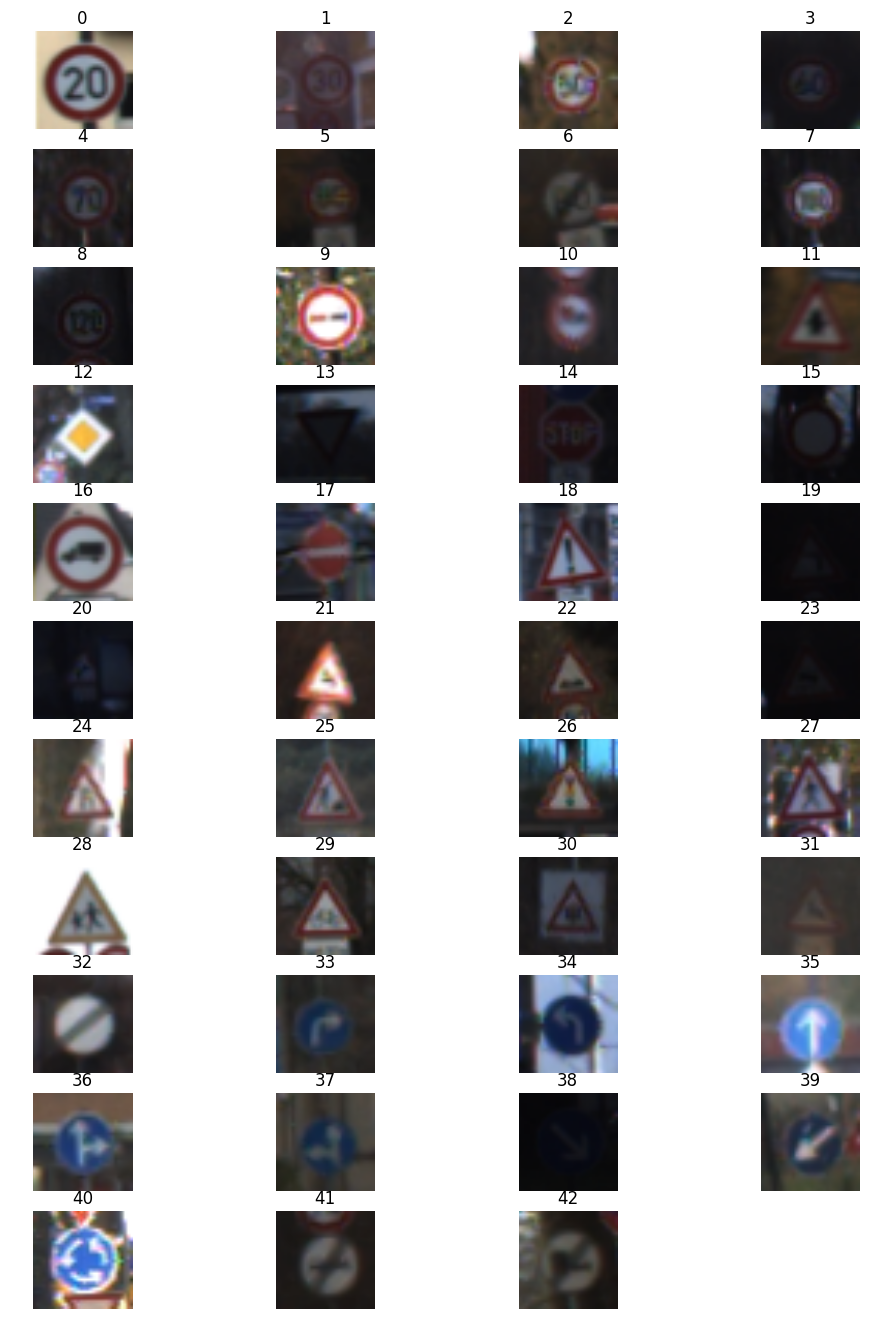

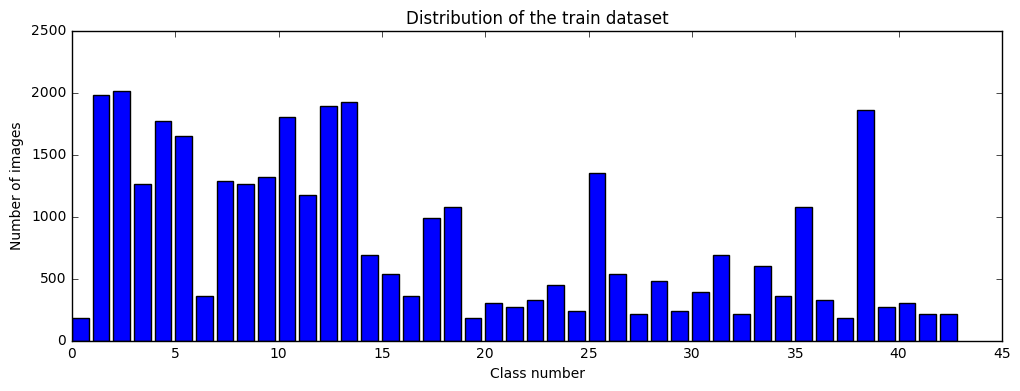

Min number of images per class = 180
Max number of images per class = 2010


In [17]:

### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
num_of_samples=[]
plt.figure(figsize=(12, 16.5))
for i in range(0, n_classes):
    plt.subplot(11, 4, i+1)
    x_selected = X_train[y_train == i]
    plt.imshow(x_selected[0, :, :, :]) #draw the first image of each class
    plt.title(i)
    plt.axis('off')
    num_of_samples.append(len(x_selected))
plt.show()

#Plot number of images per class
plt.figure(figsize=(12, 4))
plt.bar(range(0, n_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

print("Min number of images per class =", min(num_of_samples))
print("Max number of images per class =", max(num_of_samples))

In [3]:
# Let us define a function to plot figures of the traffic sign images. Along with the label at the top.
%matplotlib inline
from matplotlib import pyplot as plt
def plot_traffic_signs(figures, num_rows, num_cols, labels = None):
    fig, axes = plt.subplots(nrows = num_rows, ncols= num_cols, figsize = (20, 20))
    axes = axes.ravel()
    for fignumber, heading in zip(range(len(figures)), figures):
        axes[fignumber].imshow(figures[heading], plt.gray())
        axes[fignumber].axis("off")
        if labels!=None:
            axes[fignumber].set_title(labels[fignumber])
        else:
            axes[fignumber].set_title(heading)
    extent = axes[1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig("Example_Traffic_Signs.png")
    #fig.savefig('ax2_figure_expanded.png', bbox_inches=extent.expanded(1, 1))
# From the CSV file, let us extract the classid and signname from each row.
name_values = np.genfromtxt('signnames.csv', skip_header=1, dtype=[('myint','i8'), ('mysring','S55')], delimiter=',')
# Define how many signs to plot
num_signs = 43

    
    

In [4]:
# Define how many signs to plot
num_signs = 43
# Initialize dictionaries for storing the images and corresponding classid.
figures = {}
labels = {}
indices = [[100], [1000]]
classlist = list(np.arange(0, 42, 1))
#Loop over the signs and fill the dictionaries with images and the corresponding label.
for i in range(num_signs):
    # Pick a random sign from the training set
    index = np.random.randint(0, X_train.shape[0], 1)
    # Get the image for that sign
    img = X_train[index].squeeze()
#     if y_train[index] in classlist:
#     # Get the label, use decode to remove the b in front of the string.
#         labels[i] = name_values[y_train[index]][0][1].decode('utf-8')
#         figures[i] = img
#         classlist.remove(y_train[index])

# plot_traffic_signs(figures, 11, 4, labels)

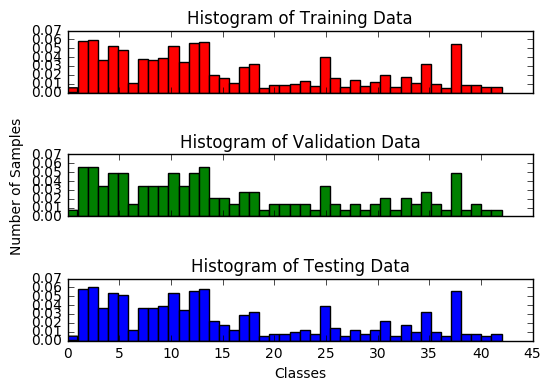

In [5]:
# Let us plot a histogram of the classes for the train, test and validation datasets.
fig, (ax0, ax1, ax2) = plt.subplots(3, sharex = True, sharey = True)
n_bins = 43
colors = ['red', 'green', 'blue']
ax0.hist(y_train, n_bins, histtype = 'bar', color = colors[0], normed = "True")
ax0.set_title("Histogram of Training Data")
ax1.hist(y_valid, n_bins, color = colors[1], normed = "True")
ax1.set_title("Histogram of Validation Data"), ax1.set_ylabel("Number of Samples")
ax2.hist(y_test, n_bins, color = colors[2], normed = "True")
ax2.set_title("Histogram of Testing Data"), ax2.set_xlabel("Classes")
fig.subplots_adjust(hspace = 1)
plt.show()
# We can observe that the distribution of classes in the three datasets is very similar.
# But there is some unequal distribution of classes in each dataset.

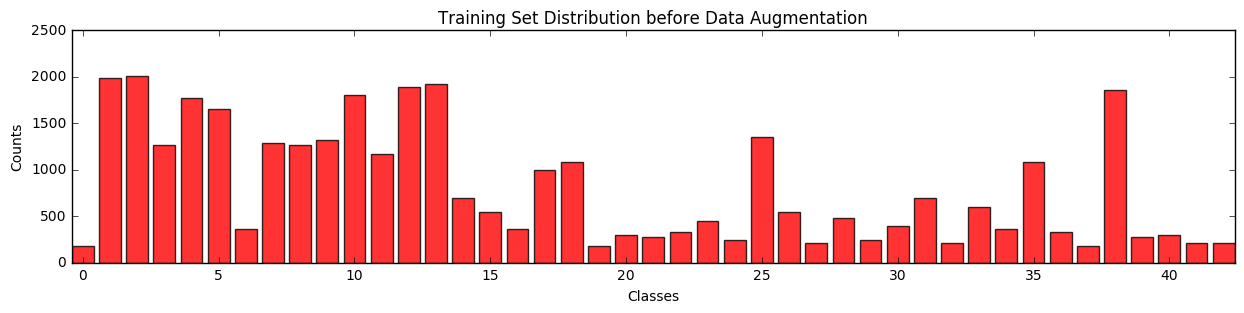

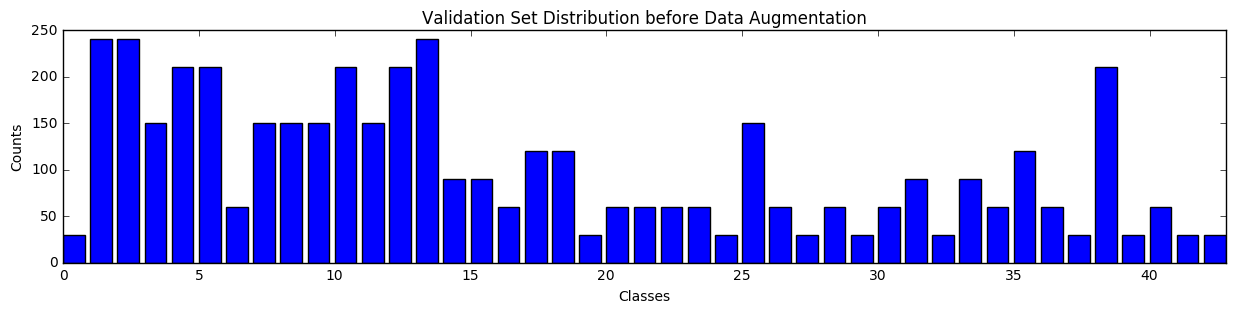

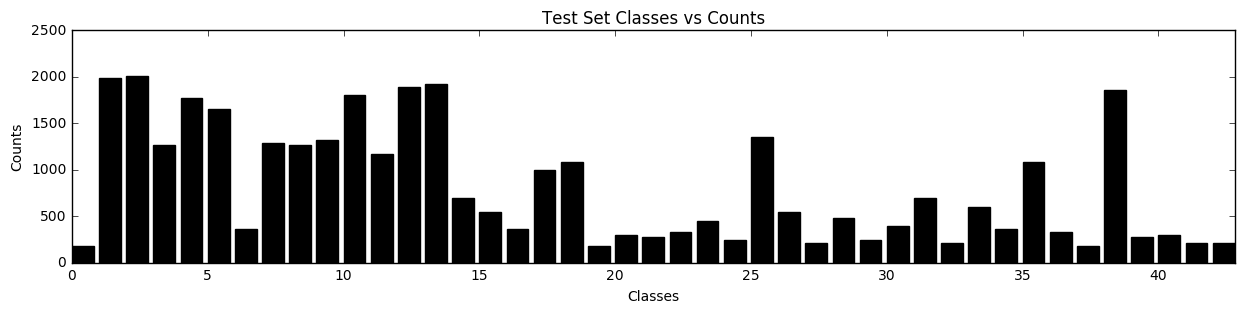

In [6]:
unique_classes_train, counts_train = np.unique(y_train, return_counts = True)
figt = plt.figure(figsize=(15, 3))  
plt.xticks(np.arange(0, 43, 5))
plt.bar(left = unique_classes_train, height = counts_train, width = 0.8, align = 'center', alpha = 0.8, color = 'r')
plt.title("Training Set Distribution before Data Augmentation"), plt.xlabel("Classes"), plt.ylabel("Counts"), plt.show()
figt.savefig("TrainWA.jpeg")
figv = plt.figure(figsize=(15, 3))  
plt.xticks(np.arange(0, 43, 5))
unique_classes_valid, counts_valid = np.unique(y_valid, return_counts = True)
plt.bar(unique_classes_valid, counts_valid)
plt.title("Validation Set Distribution before Data Augmentation"), plt.xlabel("Classes"), plt.ylabel("Counts"), plt.show()
figv.savefig("ValidWA.jpeg")
figtest = plt.figure(figsize=(15, 3))  
plt.xticks(np.arange(0, 43, 5))
unique_classes_test, counts_test = np.unique(y_test, return_counts = True)
plt.bar(unique_classes_test, counts_test, color = 'k')
plt.title("Test Set Classes vs Counts"), plt.xlabel("Classes"), plt.ylabel("Counts"), plt.show()
figtest.savefig("Test.jpeg")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
from sklearn import preprocessing
from skimage.transform import warp, AffineTransform


(34799, 32, 32, 1)


IndexError: index 8 is out of bounds for axis 0 with size 8

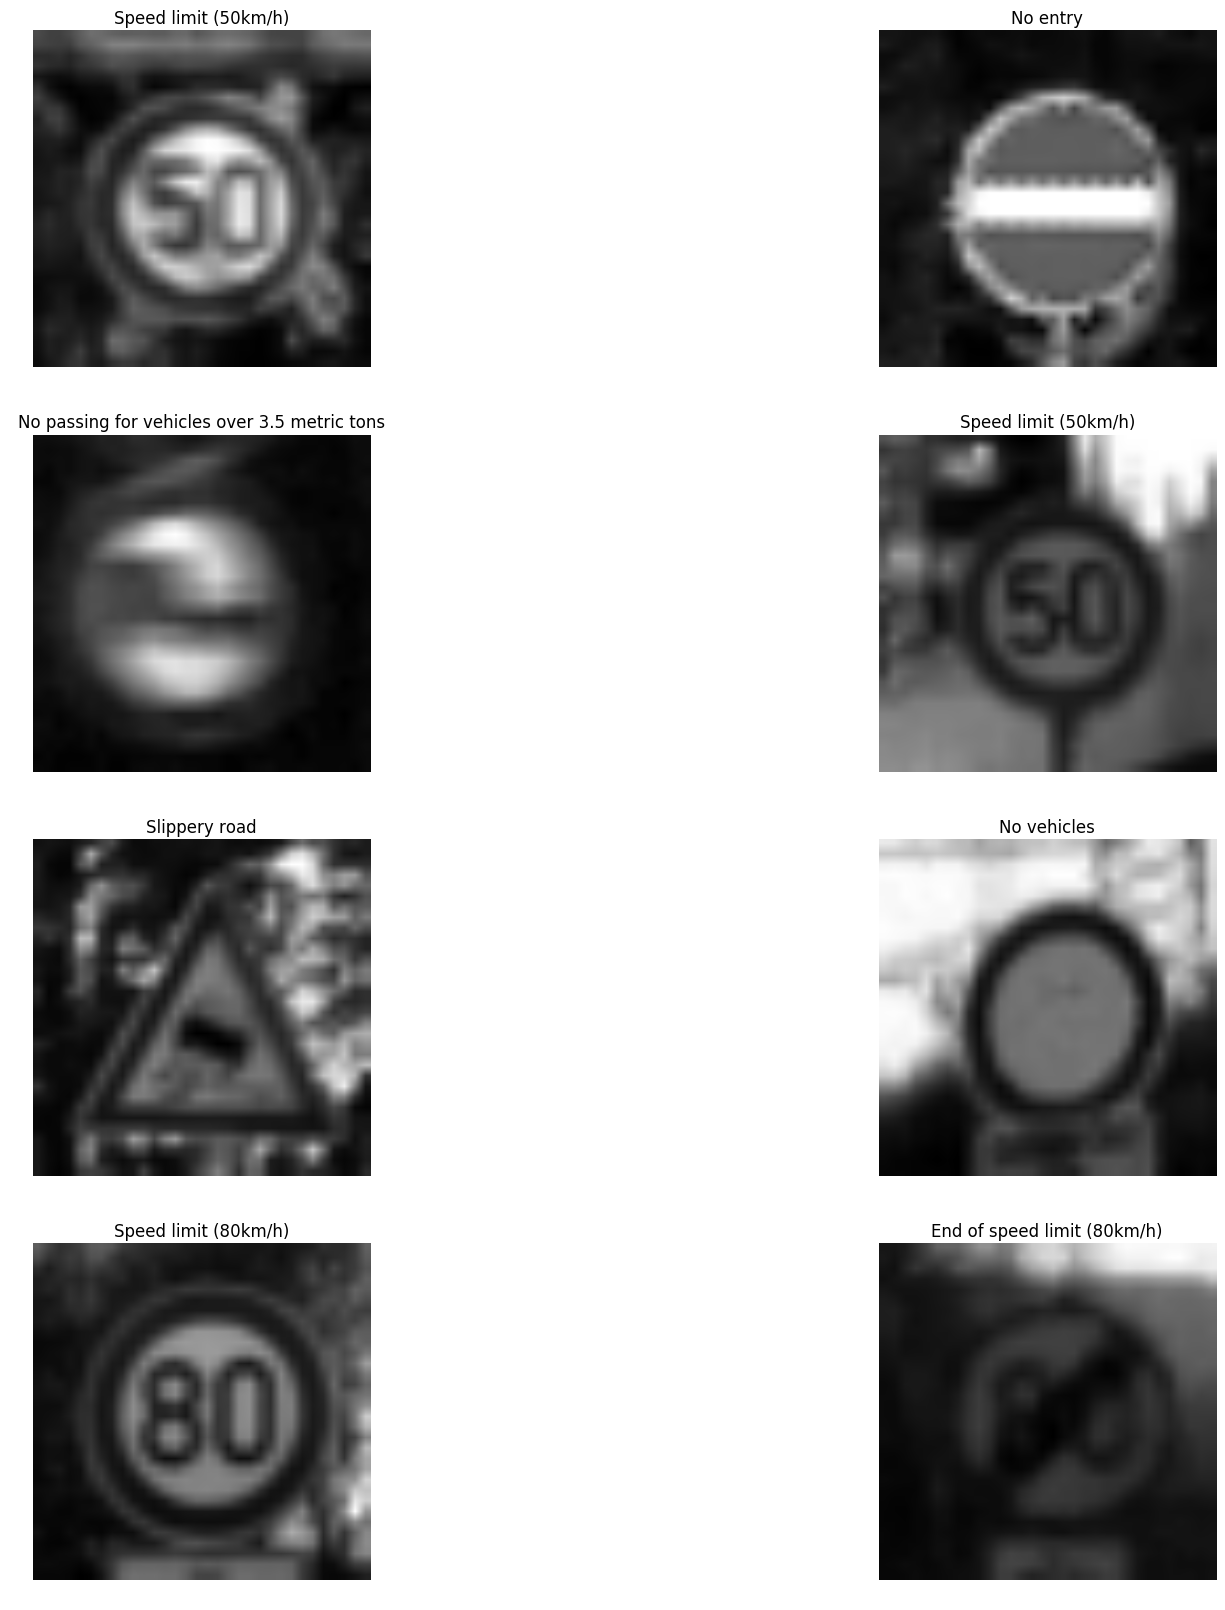

In [7]:
# Let us convert the images to grayscale.
# Here I will use the technqiue taking the average of the three channels to convert each image to grayscale.
X_train_color = X_train
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)

X_valid_color = X_valid
X_valid_gray = np.sum(X_valid/3, axis = 3, keepdims = True)

X_test_color = X_test
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)

# Now there is only one channel (grayscale). Let us print the shape to confirm this.
print(X_train_gray.shape)

X_train = X_train_gray
X_valid = X_valid_gray
X_test = X_test_gray
for i in range(num_signs):
    # Pick a random sign from the training set
    index = np.random.randint(0, X_train.shape[0], 1)
    # Get the image for that sign
    img = X_train[index].squeeze()
    # Get the label, use decode to remove the b in front of the string.
    labels[i] = name_values[y_train[index]][0][1].decode('utf-8')
    figures[i] = img

plot_traffic_signs(figures, 4, 2, labels)

In [56]:
X_train.shape[0]



48245

In [8]:
import cv2
# Let us define some empty lists to store the extra images to be augmented.
X_train_aug1 = []
y_train_aug1 = []

X_train_aug2 = []
y_train_aug2 = []

aug_counts_train = counts_train
for i in range(n_train):
    # We want to keep augmenting each class until it has atleast 3000 samples.
    if(aug_counts_train[y_train[i]] < 3000):
        for j in range(3):
            # In the first transformation, we translate the image.
            # We pick a random dx and dy in range of [-1.5, 1.5] and apply it to the image.
            # We append this translated image to the first list. 
            x_t, y_t = np.random.randint(-1.5, 1.5, 2)
            Mtranslate = np.float32([[1, 0, x_t], [0, 1, y_t]])
            img_translated = cv2.warpAffine(X_train[i], Mtranslate, (X_train[i].shape[0], X_train[i].shape[1]))
            img_translated = img_translated[:,:,None]
            X_train_aug1.append(img_translated)
            y_train_aug1.append(y_train[i])
            
            # In the second transformation, we change the perspective of the image
            # The original perspective coordinates are the corners of the 32x32 image.
            # We then pick a random upper and lower coordinates b/w (27, 32) and (0,5) respectively.
            # We store these randomized coordinate in another array.
            upper = np.random.randint(27, 32)
            lower = np.random.randint(0, 5)
            coordinates_original = np.float32([[0,0],[32,0],[0,32],[32,32]])
            coordinates_transformed = np.float32([[0, 0], [upper, lower], [lower, 32],[32, upper]])
            Mperspective = cv2.getPerspectiveTransform(coordinates_original, coordinates_transformed)
            img_perspective = cv2.warpPerspective(X_train[i], Mperspective, (32,32))
            X_train_aug2.append(img_perspective)
            y_train_aug2.append(y_train[i])
            
            # In the final transformation, we rotate the image by a random scalar b/w (-15, 15) degrees.
            rot_angle = np.random.randint(-15, 15)
            Mrotated = cv2.getRotationMatrix2D((X_train[i].shape[0]/2, X_train[i].shape[1]/2), rot_angle, 1)
            img_rotated = cv2.warpAffine(X_train[i], Mrotated, (X_train[i].shape[0], X_train[i].shape[1]))
            X_train_aug2.append(img_rotated)
            y_train_aug2.append(y_train[i])
            
            aug_counts_train[y_train[i]] += 3
print(X_train.shape)   
X_train_aug1 = np.array(X_train_aug1)
print(X_train_aug1.shape)
y_train_aug1 = np.array(y_train_aug1)
X_train_new = np.concatenate((X_train, X_train_aug1), axis=0)
y_train_new = np.concatenate((y_train, y_train_aug1), axis=0)

X_train_aug2 = np.array(X_train_aug2)
print(X_train_aug2.shape)
y_train_aug2 = np.array(y_train_aug2)
X_train_aug2 = np.reshape(X_train_aug2, (np.shape(X_train_aug2)[0], 32, 32, 1))
X_train_new = np.concatenate((X_train_new, X_train_aug2), axis=0)
y_train_new = np.concatenate((y_train_new, y_train_aug2), axis=0)

X_train_new = np.concatenate((X_train_new, X_valid), axis=0)
y_train_new = np.concatenate((y_train_new, y_valid), axis=0)
print(X_train_new.shape), print(y_train_new.shape)
#del(X_train_new)
#del(y_train_new)

NameError: name 'counts_train' is not defined

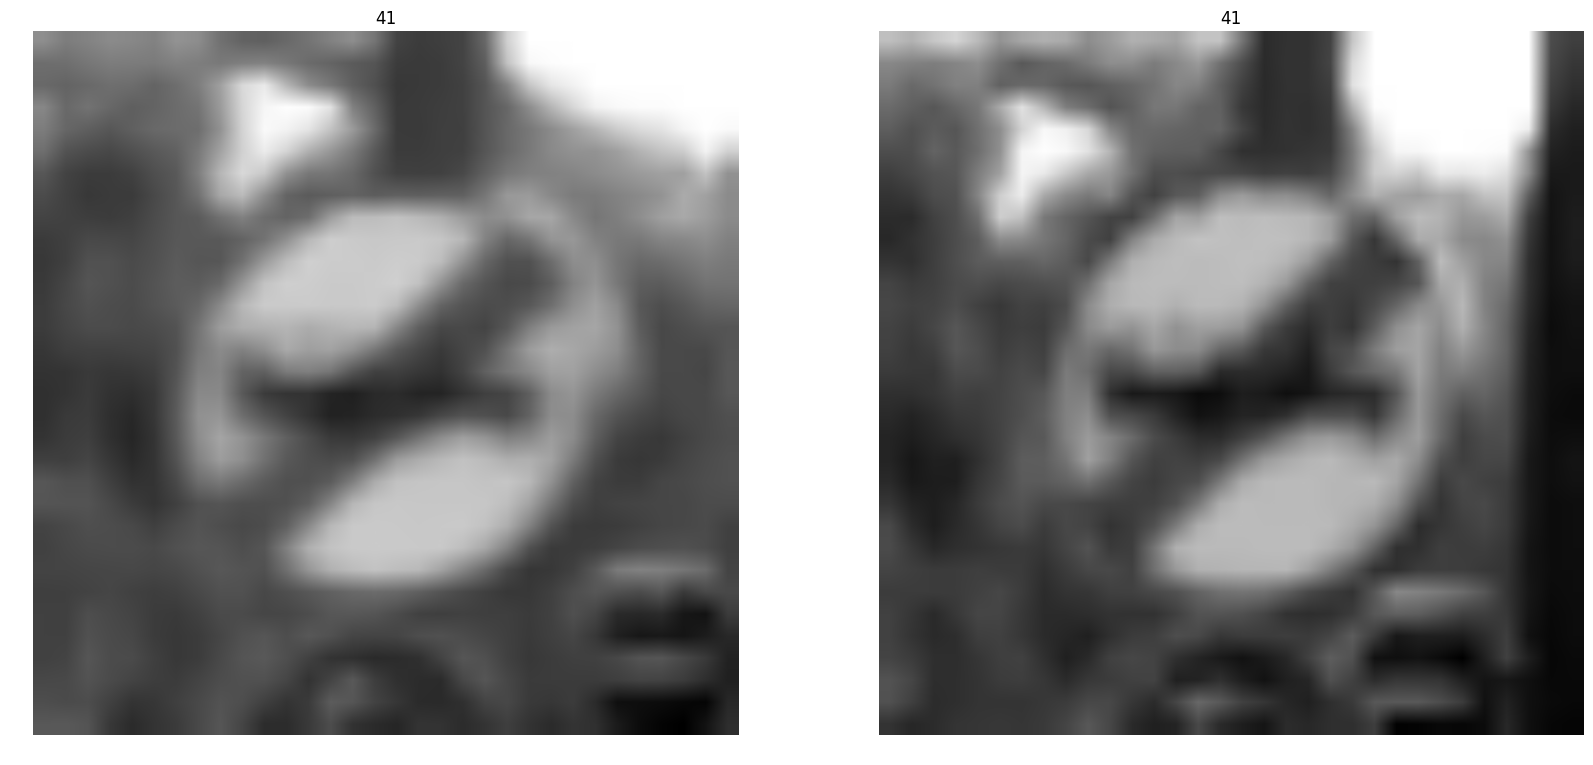

In [46]:
X_train = X_train_new
y_train = y_train_new
figuresaug = {}
labelsaug = {}
figuresaug[0] = X_train[100].squeeze()
labelsaug[0] = y_train[100]
figuresaug[1] = X_train[100+1].squeeze()
labelsaug[1] = y_train[100+1]
plot_traffic_signs(figuresaug, 1, 2, labelsaug)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

# After augmenting, let us inspect the datasets again as before using plot bars.
unique_classes_train, counts_train = np.unique(y_train, return_counts = True)
figtrain = plt.figure(figsize=(15, 3))  
plt.xticks(np.arange(0, 43, 5))
plt.bar(left = unique_classes_train, height = counts_train, width = 0.8, align = 'center', alpha = 0.8, color = 'r')
plt.title("Training Set Distribution with Data Augmentation"), plt.xlabel("Classes"), plt.ylabel("Counts"), plt.show()
figtrain.savefig("TrainA.jpeg")

figvalid = plt.figure(figsize=(15, 3))  
plt.xticks(np.arange(0, 43, 5))
unique_classes_valid, counts_valid = np.unique(y_valid, return_counts = True)
plt.bar(unique_classes_valid, counts_valid)
plt.title("Validation Set Distribution with Data Augmentation"), plt.xlabel("Classes"), plt.ylabel("Counts"), plt.show()
figvalid.savefig("ValidA.jpeg")

figtest = plt.figure(figsize=(15, 3))  
plt.xticks(np.arange(0, 43, 5))
unique_classes_test, counts_test = np.unique(y_test, return_counts = True)
plt.bar(unique_classes_test, counts_test, color = 'k')
plt.title("Test Set Distribution"), plt.xlabel("Classes"), plt.ylabel("Counts"), plt.show()

ImportError: No module named 'sklearn.model_selection'

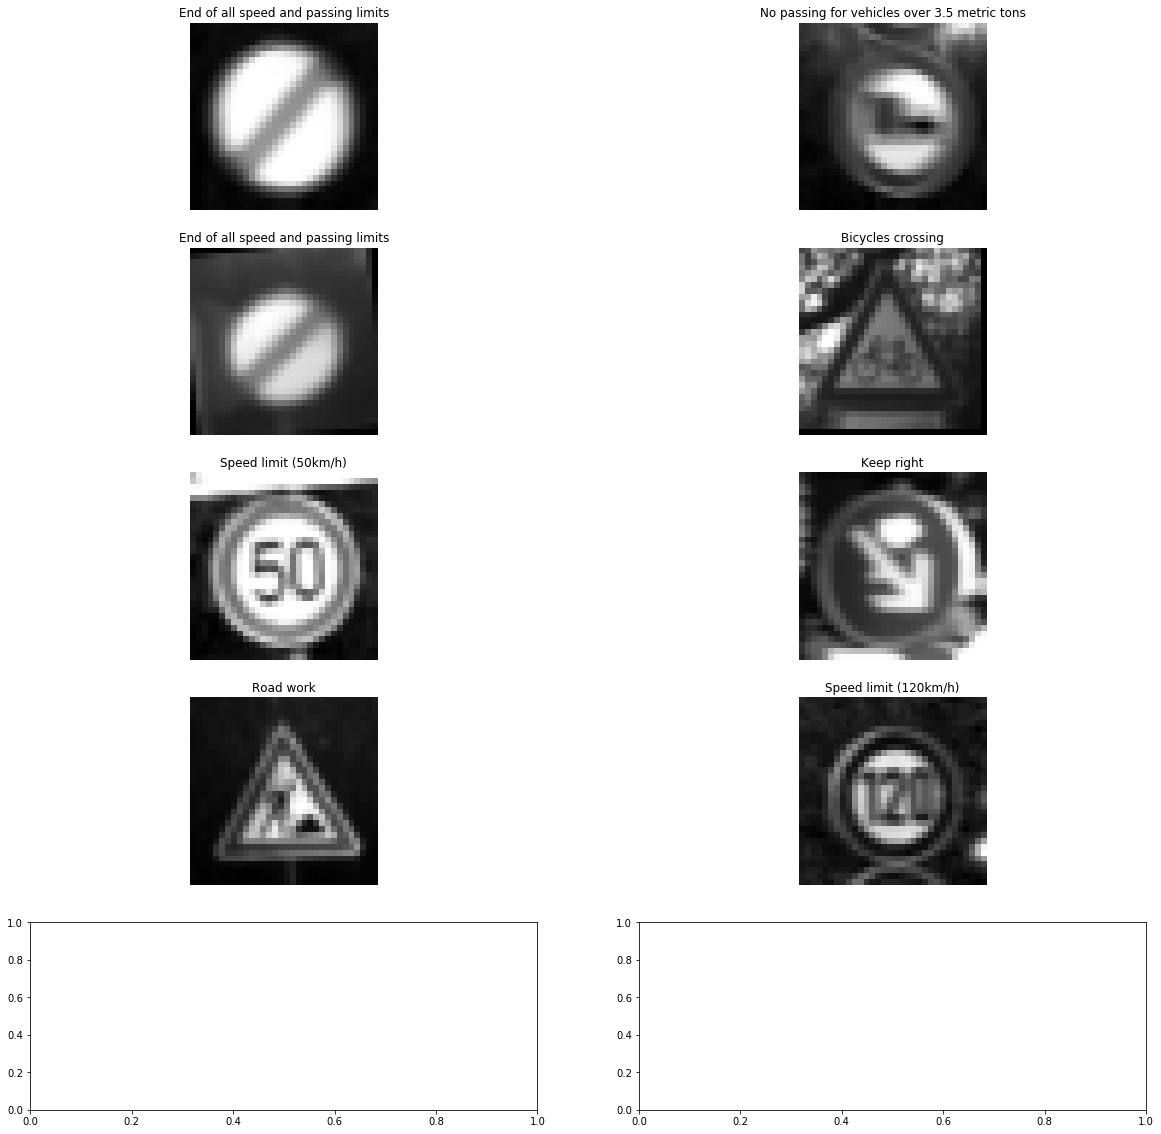

In [12]:
# Let us normalize the images to the range -0.5 to 0.5
X_train = (X_train/255.) - 0.5
X_valid = (X_valid/255.) - 0.5
X_test = (X_test/255.) - 0.5
for i in range(num_signs):
    # Pick a random sign from the training set
    index = np.random.randint(0, X_train.shape[0], 1)
    # Get the image for that sign
    img = X_train[index].squeeze()
    # Get the label, use decode to remove the b in front of the string.
    labels[i] = name_values[y_train[index]][0][1].decode('utf-8')
    figures[i] = img

plot_traffic_signs(figures, 5, 2, labels)

### Model Architecture

In [9]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
xglorot = False
if xglorot:
    def weight_variable(shape, mean, std, name):
        fan_in = np.prod(shape[:-1])
        initial = np.random.randn(*shape) / np.sqrt(fan_in / 2.)
        return tf.Variable(initial, dtype = tf.float32)
else:
    def weight_variable(shape, mean, sigma, name):
         return tf.Variable(tf.random_normal(shape, mean, sigma), name = name)

def bias_variable(shape, name):
    # create bias variable given 1-D shape of fan_out
    return tf.Variable(tf.constant(0.1, shape = shape), dtype = tf.float32, name = name)
def dropout(layer, keep_prob):
    return tf.nn.dropout(layer, keep_prob)   

# L1 through Lout define the depth of each of the layers.
# Named variables and placeholders so the names can be used when the saved session is restored. 
# Named certain operations as well for the same reason
rate = 5*1e-4
mu = 0
sigma = 0.1
L1 = 6
L2 = 16
L3 = 120
L4 = 84
Lout = 43
image_depth = X_train.shape[3]
KEEP_PROB1 = 1.0
KEEP_PROB2 = 1.0

x = tf.placeholder(tf.float32, (None, 32, 32, image_depth), name = "x")
y = tf.placeholder(tf.int32, (None), name = "y")
    
# SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28xL1.
conv1_W = weight_variable((5, 5, image_depth, L1), mu, sigma, "conv1_W")
conv1_b = bias_variable([L1], "conv1_b")
conv1   = tf.add(tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID'), conv1_b, name = "conv1_op")
#print(conv1.shape)
#conv1_layer = tf.get_variable("conv1_layer", dtype=tf.float32, 
#  initializer=conv1, validate_shape = False)

# SOLUTION: Activation.
conv1 = tf.nn.relu(conv1, name = "conv1_relu")

# SOLUTION: Pooling. Input = 28x28xL1. Output = 14x14xL1.
conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
#conv2_W = tf.Variable(tf.random_uniform(shape=(5, 5, 6, 16), minval=-2.45/np.sqrt(5*5*6*16), maxval=+2.45/np.sqrt(5*5*6*16)))
conv2_W = weight_variable((5, 5, L1, L2), mu, sigma, "conv2_W")
conv2_b = bias_variable([L2], "conv2_b")
conv2   = tf.add(tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID'), conv2_b, name = "conv2_op")
#print(conv2.shape)
#conv2_layer = tf.get_variable("conv2_layer", dtype=tf.float32, 
# initializer=conv2, validate_shape = False)
# SOLUTION: Activation.
conv2 = tf.nn.relu(conv2, name = "conv2_relu")

# SOLUTION: Pooling. Input = 10x10xL2. Output = 5x5xL2.
conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# SOLUTION: Flatten. Input = 5x5xL2. Output = 5*5*L2.
fc0   = flatten(conv2)
    
# SOLUTION: Layer 3: Fully Connected. Input = 5*5*L2. Output = L3.
#fc1_W = tf.Variable(tf.random_uniform(shape=(400, 120), minval=-2.45/np.sqrt(400*120), maxval=2.45/np.sqrt(400*120)))
fc1_W = weight_variable((5*5*L2, L3), mu, sigma, "fc1_W")
fc1_b = bias_variable([L3], "fc1_b")
fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
# SOLUTION: Activation.
fc1    = tf.nn.relu(fc1)
fc1 = dropout(fc1, KEEP_PROB1)

# SOLUTION: Layer 4: Fully Connected. Input = L3. Output = L4.
#fc2_W  = tf.Variable(tf.random_uniform(shape=(120, 84), minval=-2.45/np.sqrt(400*120), maxval = 2.45/np.sqrt(400*120)))
fc2_W = weight_variable((L3, L4), mu, sigma, "fc2_W")
fc2_b  = bias_variable([L4], "fc2_b")
fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
# SOLUTION: Activation.
fc2    = tf.nn.relu(fc2)
fc2 = dropout(fc2, KEEP_PROB2)

# SOLUTION: Layer 5: Fully Connected. Input = L4. Output = Lout.
fc3_W = weight_variable((L4, Lout), mu, sigma, "fc3_W")
fc3_b  = bias_variable([Lout], "fc3_b")
logits = tf.add(tf.matmul(fc2, fc3_W), fc3_b, name = "logits_op")

# We rescale the logits tensor as softmax involves taking e^logits and this may become too large if the logits are big.
# This is actually done implicitly within the softmax cross entropy function.
logits_rescaled = tf.transpose(tf.subtract(tf.transpose(logits), tf.reduce_max(logits, axis = 1)))

one_hot_y = tf.one_hot(y, Lout, name = "one_hot_op")
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits, name = "cross_entropy_op")
loss_operation = tf.reduce_mean(cross_entropy, name = "loss_op")
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1), name = "correct_pred_op")
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name = "accuracy_op")

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
#saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


Training...
EPOCH 1 ...
Average Training Cost =  11.4512008235
Validation Cost =  3.74959
Validation Accuracy = 0.027
Training Accuracy = 0.021

EPOCH 2 ...
Average Training Cost =  3.75885854348
Validation Cost =  3.66738
Validation Accuracy = 0.050
Training Accuracy = 0.058

EPOCH 3 ...
Average Training Cost =  3.6707251415
Validation Cost =  3.7811
Validation Accuracy = 0.071
Training Accuracy = 0.067

EPOCH 4 ...
Average Training Cost =  3.67888833676
Validation Cost =  3.80571
Validation Accuracy = 0.066
Training Accuracy = 0.080

EPOCH 5 ...
Average Training Cost =  3.59255516793
Validation Cost =  3.57801
Validation Accuracy = 0.093
Training Accuracy = 0.109

EPOCH 6 ...
Average Training Cost =  3.41156798491
Validation Cost =  3.59601
Validation Accuracy = 0.099
Training Accuracy = 0.110

EPOCH 7 ...
Average Training Cost =  3.41738593886
Validation Cost =  3.7038
Validation Accuracy = 0.034
Training Accuracy = 0.037

EPOCH 8 ...
Average Training Cost =  3.73936731525
Validatio

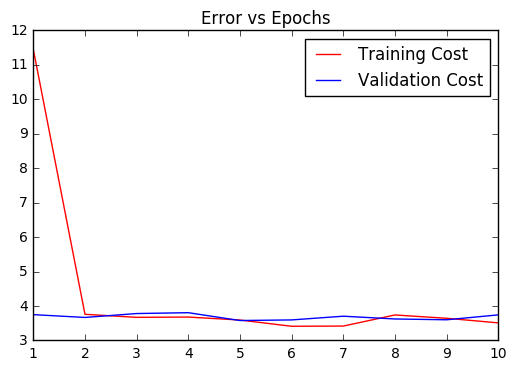

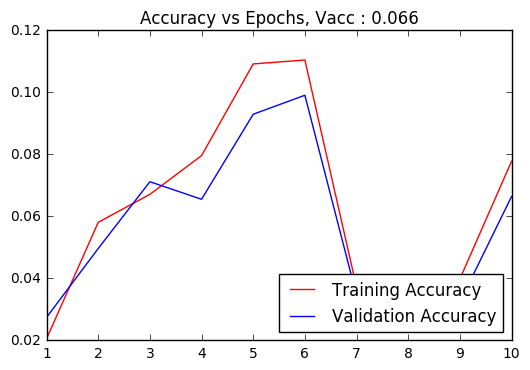

NameError: name 'saver' is not defined

In [11]:
EPOCHS = 10
BATCH_SIZE = 128
development = False
tc = []
vc = []
ta = []
va = []
epochs = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    if development == True:
        num_examples = 128
    else:
        num_examples = len(X_train)
    num_batches = np.int(num_examples / BATCH_SIZE)
    
    print("Training...")
    for i in range(EPOCHS):
        avg_train_cost = 0
        avg_valid_cost = 0
        #X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            
            sess.run([training_operation], feed_dict={x: batch_x, y: batch_y})
            #print(sess.run(conv1_W))
            train_cost = sess.run(loss_operation, feed_dict={x:batch_x, y:batch_y})            
            avg_train_cost += train_cost/ (num_batches)
            
        valid_cost = sess.run(loss_operation, feed_dict={x:X_valid, y:y_valid})    
        epochs.append(i+1)
        tc.append(avg_train_cost)
        vc.append(valid_cost)
        validation_accuracy = evaluate(X_valid, y_valid)
        training_accuracy = evaluate(X_train[:(num_examples)], y_train[:(num_examples)])
        ta.append(training_accuracy)
        va.append(validation_accuracy)
        print("EPOCH {} ...".format(i+1))        
        print("Average Training Cost = ", avg_train_cost)
        print("Validation Cost = ", valid_cost)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()
    plt.figure(1), plt.title("Error vs Epochs")
    fig1 = plt.plot(epochs, tc, 'r-', label = "Training Cost")
    plt.plot(epochs, vc, 'b-', label = "Validation Cost")
    plt.legend(loc = "upper right"), plt.show()# fig1.savefig("ErrorPlot.png") 
    
    plt.figure(2), plt.title("Accuracy vs Epochs, Vacc : {:0.3f}".format(validation_accuracy))
    fig2 = plt.plot(epochs, ta, 'r-', label = "Training Accuracy")
    plt.plot(epochs, va, 'b-', label = "Validation Accuracy")
    plt.legend(loc = "lower right"), plt.show()# fig2.savefig("AccuracyPlot.png")
    
    saver.save(sess, './lenetnew')
    print("Model saved")

In [12]:
# Here we need to find the testing accuracy. After we have decided on the network architecture and hyperparameters.
# We load the trained network and variables. And run it on the test set.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

NameError: name 'saver' is not defined

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

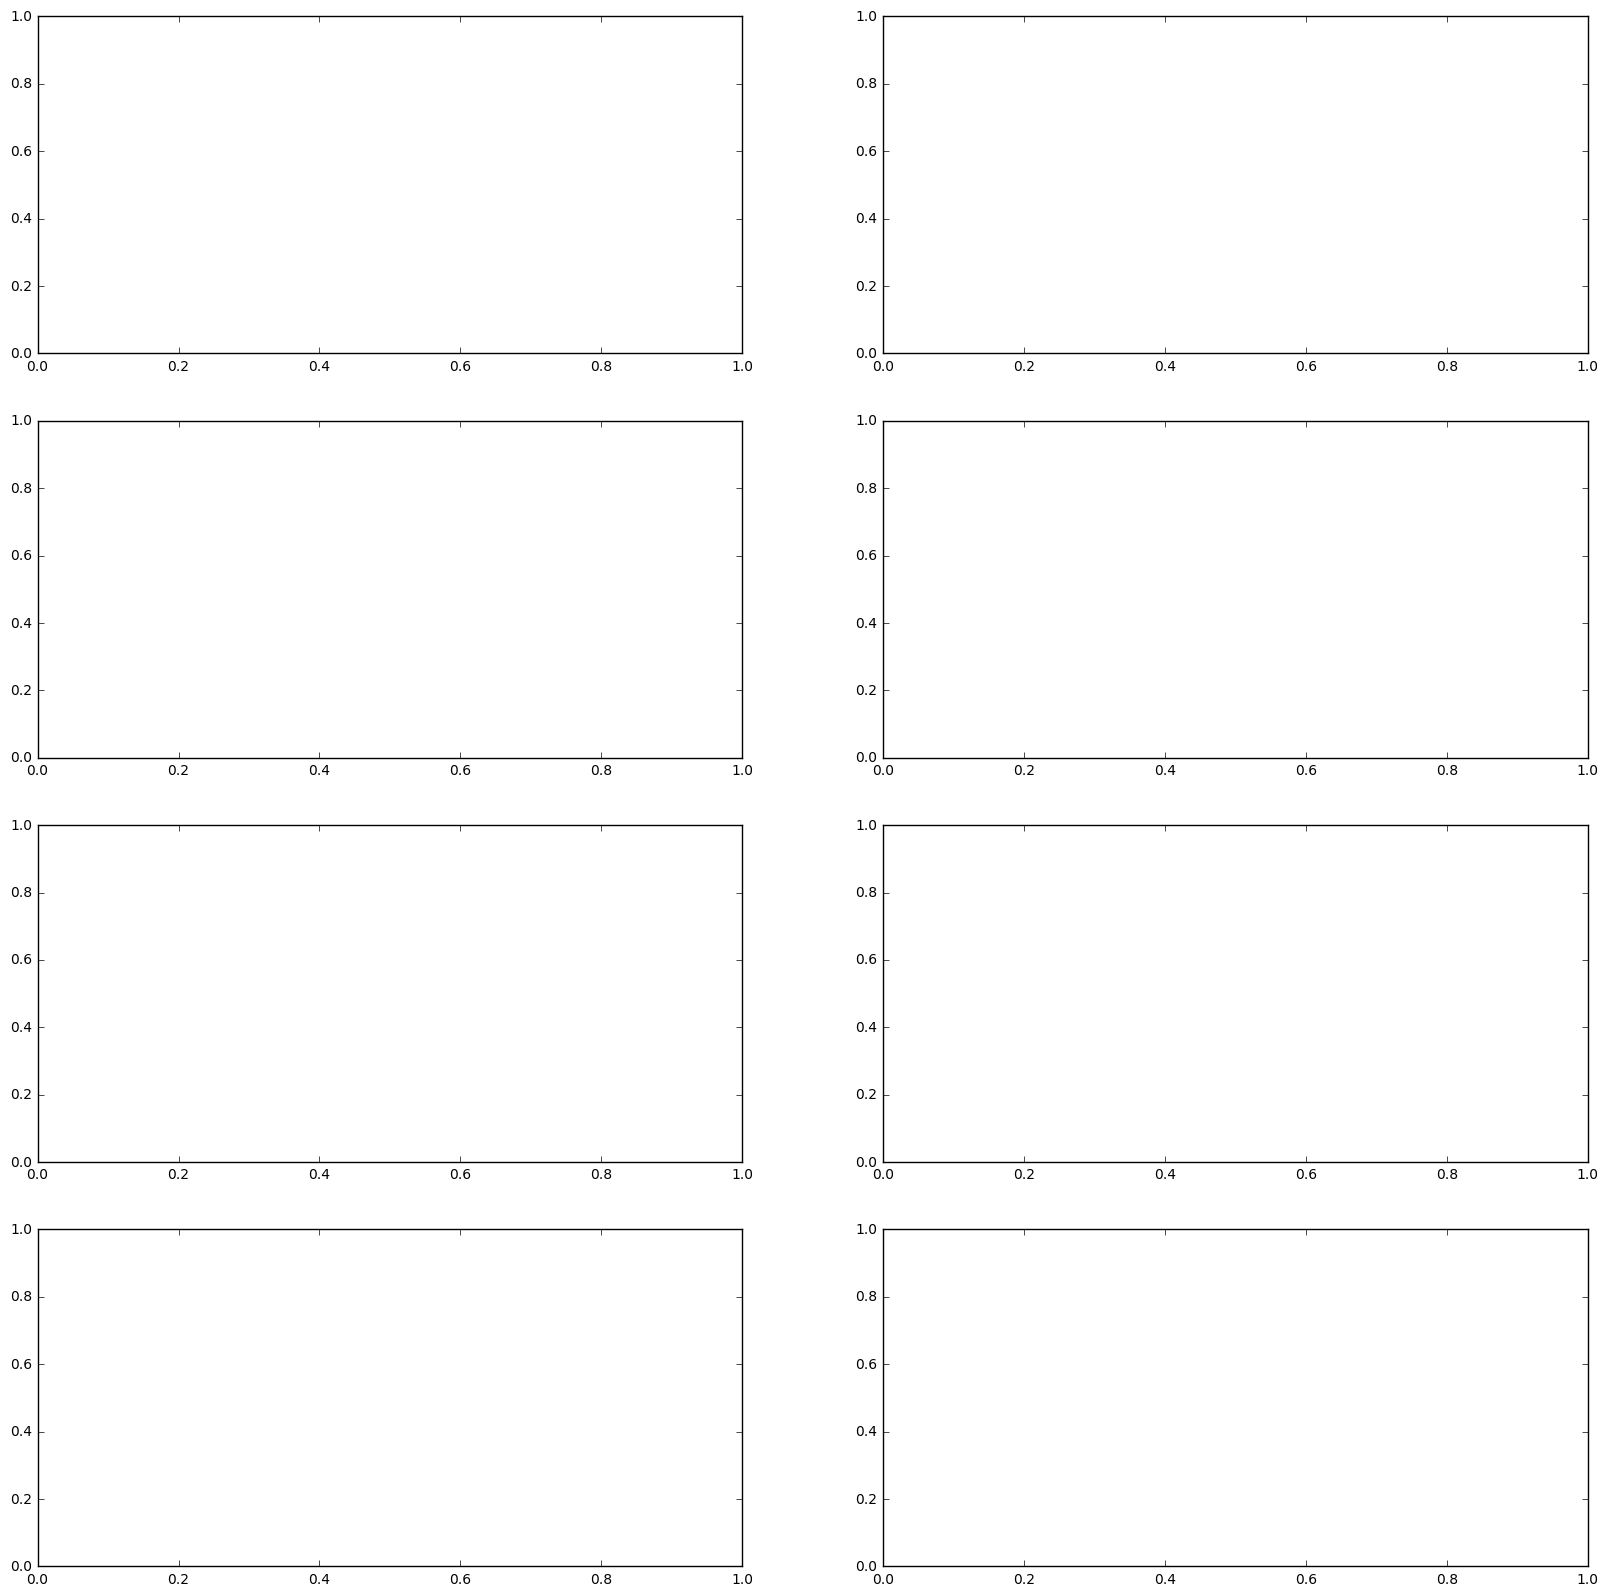

In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
# Define a function to load and plot an image using a given path.
import cv2
import glob
imagepaths = sorted(glob.glob('./99/*.jpg'))
example_signs = []
# Here we define the actual labels for the images.
ground_truth = np.array([1, 22, 35, 15, 37, 18, 25, 3], dtype = "int32")

figures = {}
labels = {}
for i, path in enumerate(imagepaths):
    img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    figures[i] = img
    labels[i] = name_values[ground_truth[i]][1].decode('utf-8')
    example_signs.append(img)

plot_traffic_signs(figures, 4, 2, labels)


(8, 32, 32, 3)
(8, 32, 32, 1)
(8,)


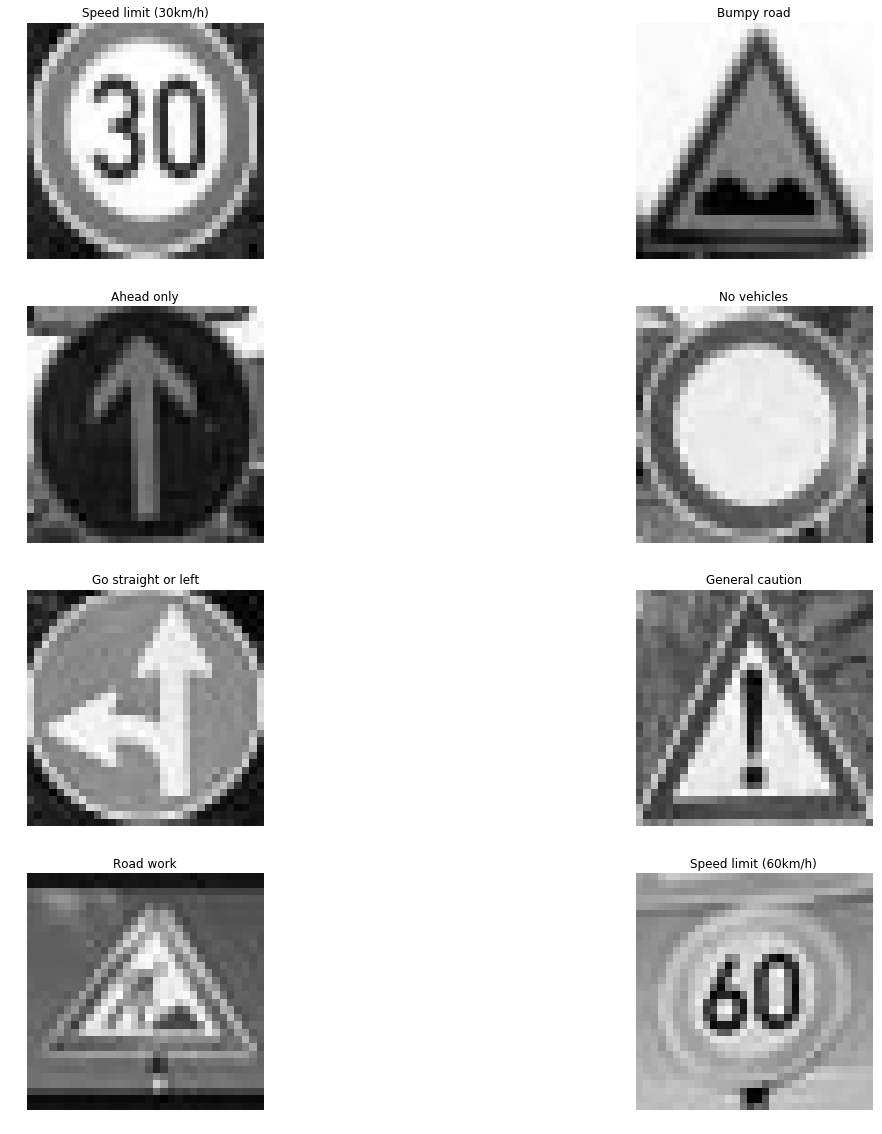

In [117]:
# Here we will convert the test images to grayscale. And then normalize them. And plot the images.
example_signs = np.array(example_signs, dtype = "float32")
print(example_signs.shape)
example_signs_gray = np.sum(example_signs/3, axis = 3, keepdims = True)
print(example_signs_gray.shape)
print(ground_truth.shape)
example_signs_normalized = example_signs_gray/255. - 0.5

figures = {}
labels = {}
for i in range(len(example_signs_normalized)):
    img = example_signs_normalized[i][:,:,0]
    #print(img.shape)
    figures[i] = img
    labels[i] = name_values[ground_truth[i]][1].decode('utf-8')
    
plot_traffic_signs(figures, 4, 2, labels) 

### Predict the Sign Type for Each Image


INFO:tensorflow:Restoring parameters from .\lenetnew
[ 1 22 35 15 37 18 25  3]


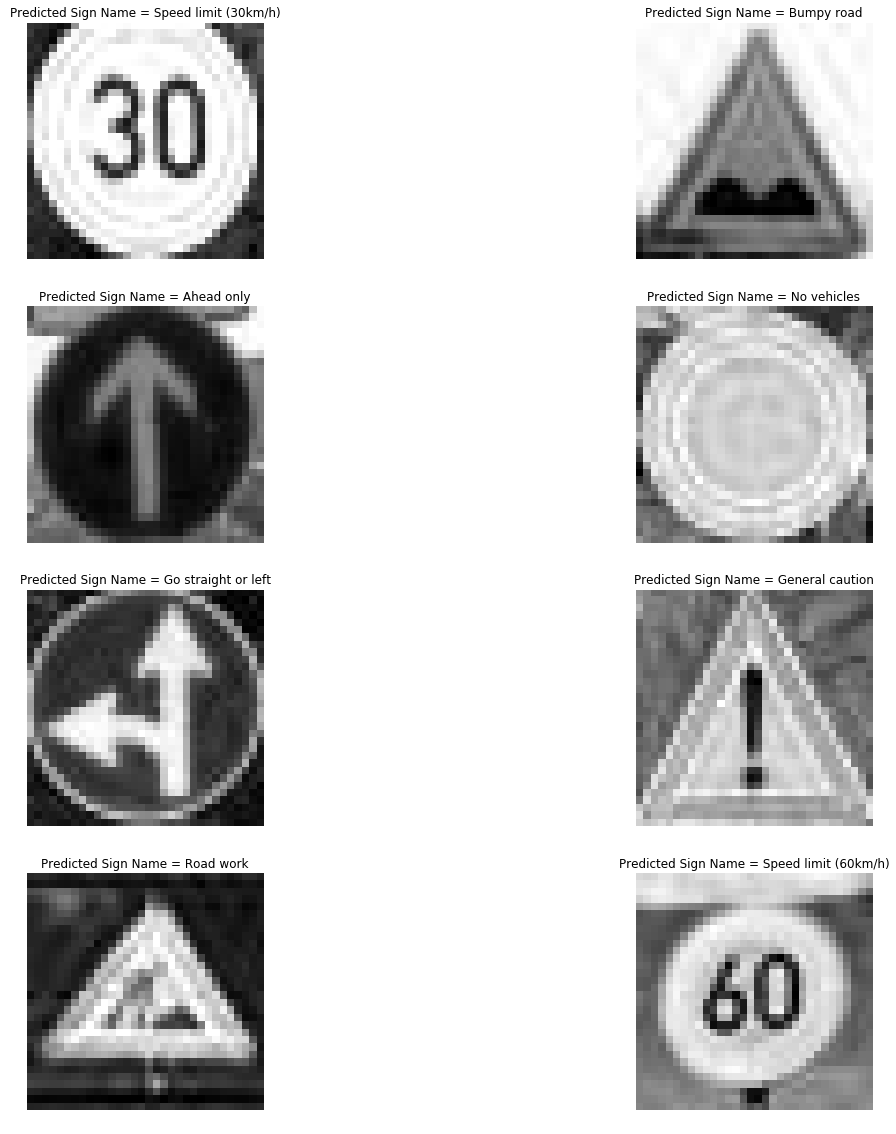

In [90]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
# Here we define two functions
# The first is a function that returns a preprocessed image given the path to the image.
# The second is a function that accepts the preprocessed image and returns the prediction of which traffic sign
# this image represents.
windows = True
if windows:
    ospath = 'C:/Users/lenovo/Documents/SDCND/Traffic-Sign-Classifier-New/mysigns/'
else:
    ospath = ''
save_filemeta = './leneta.ckpt(1).meta'
save_fileckpt = './leneta.ckpt(1)'
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np
import csv
import tensorflow as tf
num_images = 8
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    predicted_logits = sess.run(logits, feed_dict = {x: example_signs_normalized})
    predicted_classes = np.argmax(predicted_logits, axis = 1)
    print(predicted_classes)
figures = {}
labels = {}
for i in range(num_images):
    figures[i] = example_signs[i][:,:,0]
    labels[i] = "Predicted Sign Name = " + name_values[predicted_classes[i]][1].decode('utf-8')
plot_traffic_signs(figures, 4, 2, labels)

### Analyze Performance

In [131]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    predicted_logits = sess.run(logits, feed_dict = {x: example_signs_normalized})
    smax = (tf.nn.softmax(predicted_logits))
    oh_op = tf.one_hot(y, 43)
    cpred = tf.equal(tf.argmax(smax, 1), tf.argmax(oh_op, 1))
    acc_new = tf.reduce_mean(tf.cast(cpred, tf.float32))
    accuracy = sess.run(acc_new, feed_dict = {y: ground_truth})
    print("The dataset accuracy is: %.1f" %(accuracy*100) + "%" )        

INFO:tensorflow:Restoring parameters from .\lenetnew
The dataset accuracy is: 100.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from .\lenetnew
[[  1.   0.  37.  40.  39.]
 [ 22.  24.  29.  28.  25.]
 [ 35.  36.  13.  25.  34.]
 [ 15.   8.   2.   5.   1.]
 [ 37.  40.  18.  23.  27.]
 [ 18.  27.  11.  26.  24.]
 [ 25.  31.  37.  20.  23.]
 [  3.  11.  23.  28.   1.]]


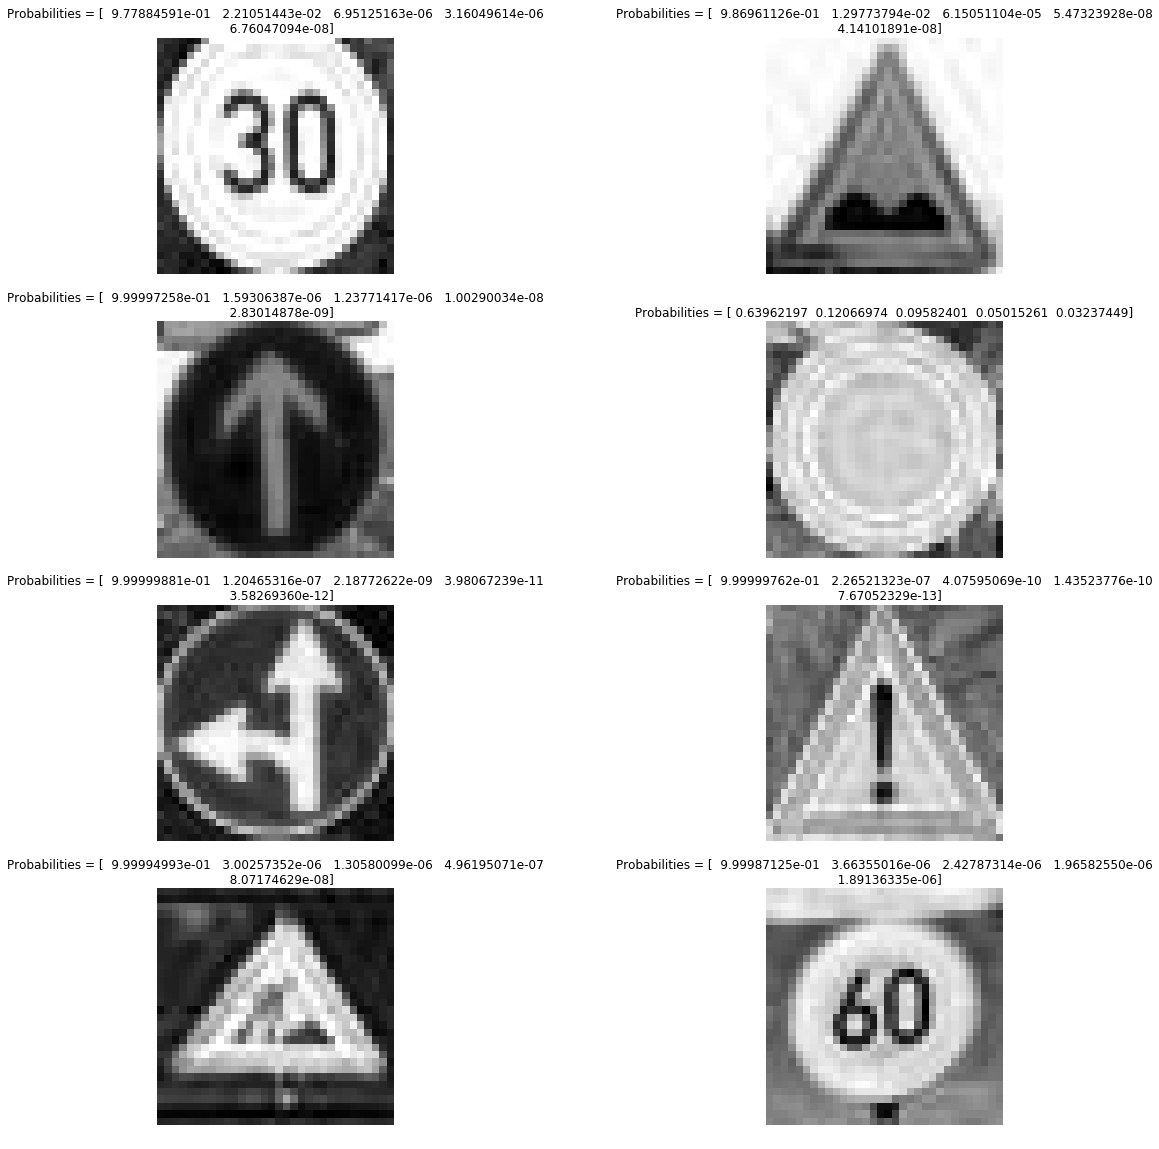

In [82]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    predicted_logits = sess.run(logits, feed_dict = {x: example_signs_normalized})
    softmax = (tf.nn.top_k(tf.nn.softmax(predicted_logits), k = 5))
    predicted_softmax = np.array((sess.run(softmax)))
    print(predicted_softmax[1])
    
    #print(predicted_softmax)
figures = {}
labels = {}
for i in range(num_images):
    figures[i] = example_signs[i][:,:,0]
    labels[i] = "Probabilities = " + np.array_str(predicted_softmax[0][i][:] )
plot_traffic_signs(figures, 4, 2, labels)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understanding the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


INFO:tensorflow:Restoring parameters from .\lenetnew


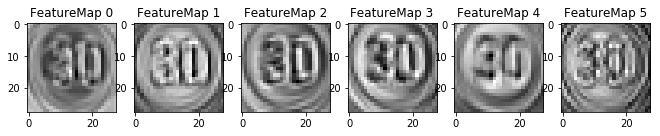

In [111]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(path, layer, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    
    
    x_in = graph.get_tensor_by_name("x:0")
    
    x = x_in
    
    image_input = path
    image_input = np.array([image_input])
    image_input = np.reshape(image_input, (32, 32, 1))
    #activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    activation = sess.run(layer, feed_dict = {x:np.array([image_input])})
    featuremaps = activation.shape[3]
    figvis = plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
    figvis.savefig("FeatureMaps.png")
save_filemeta = './lenetnew.meta'
image = cv2.cvtColor(cv2.imread('./99/1.jpg'), cv2.COLOR_BGR2GRAY)
image = image/255. -0.5
graph = tf.get_default_graph()
conv1_layer = graph.get_tensor_by_name("conv1_op:0")
conv2_layer = graph.get_tensor_by_name("conv2_op:0")
with tf.Session() as sess:
    saver = tf.train.import_meta_graph(save_filemeta)
    sess = tf.get_default_session()
    sess.run(tf.global_variables_initializer())
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    #saver.restore(sess, save_fileckpt)
    outputFeatureMap(image, conv1_layer)